In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  

# Load Data & Analysis

In [70]:
# Loading the data from csv files

train = pd.read_csv('data/train_new.csv')
test = pd.read_csv('data/test_new.csv')

In [71]:
# Look at first records of the data 
train.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [72]:
# show the information of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

# Defining the problem

### What is the input?





the input data representing e-commerce site (wish.com) product 

*   conisting of 33 features that represent each product 
*   this data contain some noise and missing data which need to clean and preprocessed




### What is the output?


The output is the rating of the prodect 


*   Ratings are in categories from 1 to 5




### What data mining function is required?

As I understand from this part of the slide


```
Data Mining Functions
1. Generalization and Summarization
2. Association and Correlation
3. Classification & Prediction
4. Clustering
5. Outlier/Anomaly Analysis
6. Time and Ordering 
7. Structure and Network Analysis
```

The data mining in this problem requires Classification & Prediction After making Outlier/Anomaly Analysis and cleaning the data


### What could be the challenges?

The Challenges represented in:


*   Missing data
*   Noise data
*   Columns (or Features) that contain incompateble data type or data scale
*   Columns (or Features) that contain text with different language
*   Columns (or Features) which consider useles and need to be removed to reduce the dimintionality
*   Rating values greater than 5








### What is the impact?

The impact of using the raw data as it is, without cleaning and reprocessing, will result a model with low accuracy that doesn't learn well or a desired from the data in the traing stage


---

the real-life impact of building a model that solve this problem is represent in making the e-commerce site (wish) predict the rating of product before the user rate it using the built model and this will lead to present the appropraite products for each user which will result the rais of customers satisfication in addition to increase the compainy profit 


### What is an ideal solution?

the ideal solution is to clean and preprocess the data before working with it



> Some of the possible solutions are:



*   Filling the missing data with approprait value 
*   Replace rating values greater than 5
*   Try to edit the values of Columns (or Features) that contain incompateble data type or data scale in order to make it have the sapme datatype or range
*   Replace the values of Columns (or Features) that contain text with different language with translated text
*   Drop useless Columns (or Features) in order to reduce the dimintionality








### What is the experimental protocol used and how was it carried out? 

after loding the data and cleaning and preprocessing it, then encodig it using lable encoding or one hot encoding, the experimental protocol used is spliting the training dataset into train and test to fit the model using the new train data and measure the perormance (f1_score) of the model using the new test data and then make the prediction by using the original test dataset


### What preprocessing steps are used?


*   view the data and understand it
*   using df.info() to get mor insight about the data
*   check the missing data using df.isna().sum()
*   removing featuers that contain same value for all the data point as it won't affect the learning of the model or the prediction resuls 
*   analysis each feature independently in order to:
  -   add approprait value for missing data
  -   replace noise data with suitable value
  -   translate text values that writen in different language
  -   adjust columns value that contain different datatype or different range  


# Data Cleaning and Preprocessing

## Remove unwanted data


In [73]:
# Specify the columns that will be dropped

# Remove columns that contain the same values as it wouldn't affect the prediction
columns_with_same_values = [col for col in train.columns if len(train[col].unique()) == 1]

# Remove columns that contain pictures as it wouldn't affect the prediction only the columns that reflect if picture exist or not may affect the prediction
picture_columns = [col for col in train.columns if ('picture' in col and 'has' not in col)]

skiped_cols = columns_with_same_values + picture_columns



In [74]:
# Drop useless features from train and test datasets
train = train.drop(columns=skiped_cols)
test = test.drop(columns=skiped_cols)

## Rating and Has urgency banner (Data Analysis and Cleaning)

In [75]:
# check if tha data contain any rating greater than 5 and if there then set it to 5
if len(train[train['rating'] > 5]) > 0 :
  train.loc[train['rating'] > 5 , 'rating'] = 5 

In [76]:
# check if there any missing values and counting them for each feature
train.isna().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

In [77]:
# Replace NA Urgency Banner with 0 
train['has_urgency_banner'] = train['has_urgency_banner'].replace(np.nan, 0)

test['has_urgency_banner'] = test['has_urgency_banner'].replace(np.nan, 0)

## Origin country (Data Analysis and Cleaning)

In [78]:
# Analysis country data
country_cnt = train['origin_country'].value_counts()
country_cnt

CN    1054
US      22
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


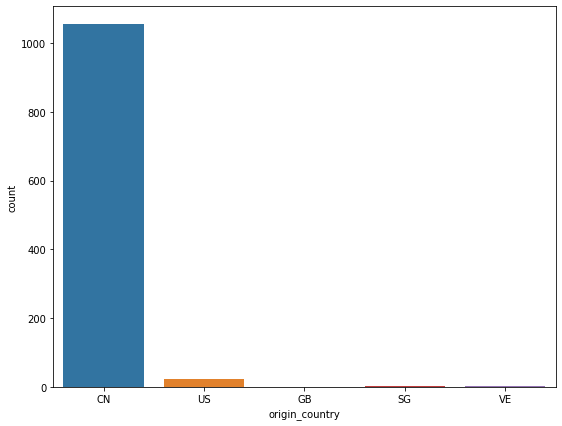

In [79]:
# plot a figure for country data counting
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot('origin_country',
              data = train,
              ax = ax)
plt.show()

In [80]:
# Set missing and low counted countries to 'Other'
# Replace NA values with 'Other'

common_countries = ['CN', 'US']
train.loc[[idx for idx, x in enumerate(train['origin_country']) if x not in common_countries], ['origin_country']] = 'Other'
test.loc[[idx for idx, x in enumerate(test['origin_country']) if x not in common_countries], ['origin_country']] = 'Other'

In [81]:
# recount country data after cleanig and changing that happend on it
country_cnt = train['origin_country'].value_counts()
country_cnt

CN       1054
US         22
Other      18
Name: origin_country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


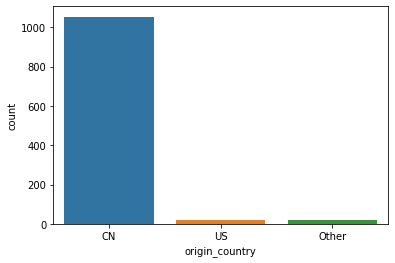

In [82]:
# plot a figure for country data counting after cleaning it
sns.countplot('origin_country',
              data = train)


In [83]:
# check the missing values on the training data and counting them for each feature
train.isna().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner                0
urgency_text                    745
origin_country                    0
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

In [84]:
# check the missing values on the testing data and counting them for each feature
test.isna().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner                0
urgency_text                    355
origin_country                    0
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                       0
merchant_has_profile_picture

## Product variation size id (Data Analysis and Cleaning)

In [85]:
# Analysis the product_variation_size_id -- count the number of repetition for each category
product_size = train['product_variation_size_id'].value_counts()
product_size[product_size > 1]

S            444
XS           248
M            135
XXS           76
L             29
S.            13
XL            12
XXL           11
XXXS           5
M.             4
Size-XS        4
Size S         4
4XL            4
XS.            4
Size-S         3
2XL            3
10 ml          3
s              3
Size M         2
35             2
Size4XL        2
Size -XXS      2
SizeL          2
25             2
SIZE XS        2
29             2
S Pink         2
XXXXXL         2
33             2
2pcs           2
Name: product_variation_size_id, dtype: int64

In [86]:
# Clean data of product_variation_size_id

# creat function to format the strings of product_variation_size_id 
# to ease the apply of it into taining and testing datasets
def format_product_size(df):
  df['product_variation_size_id'] = [str(x).replace('.', '') for x in df['product_variation_size_id']]
  df['product_variation_size_id'] = [str(x).replace('s', 'S') for x in df['product_variation_size_id']]

  df['product_variation_size_id'] = [str(x).replace(' ', '') for x in df['product_variation_size_id']]
  df['product_variation_size_id'] = [str(x).replace('-', '') for x in df['product_variation_size_id']]
  df['product_variation_size_id'] = [str(x).replace('Size', '') for x in df['product_variation_size_id']]
  df['product_variation_size_id'] = [str(x).replace('size', '') for x in df['product_variation_size_id']]
  df['product_variation_size_id'] = [str(x).replace('SIZE', '') for x in df['product_variation_size_id']]


  df['product_variation_size_id'] = [str(x).replace('2X', 'XX') for x in df['product_variation_size_id']]
  df['product_variation_size_id'] = [str(x).replace('4X', 'XXXX') for x in df['product_variation_size_id']]
  df['product_variation_size_id'] = [str(x).replace('5X', 'XXXXX') for x in df['product_variation_size_id']]


# Call function of format_product_size
format_product_size(train)
format_product_size(test)

In [87]:
# Replace NA values
train['product_variation_size_id'] = train['product_variation_size_id'].replace(np.nan, "Other")
test['product_variation_size_id'] = test['product_variation_size_id'].replace(np.nan, "Other")

In [88]:
# define the main size categories
main_product_size_categories = ['S', 'XS', 'M', 'XXS', 'L', 'XL', 'XXL', 'XXXS', 'XXXXL', 'XXXXXL']

# replace any category other than the main_product_size_categories with 'Other' 
train.loc[[idx for idx, x in enumerate(train['product_variation_size_id']) if x not in main_product_size_categories], ['product_variation_size_id']] = 'Other'
test.loc[[idx for idx, x in enumerate(test['product_variation_size_id']) if x not in main_product_size_categories], ['product_variation_size_id']] = 'Other'


In [89]:
# count the number of repetition for each category after minimizing the number of categories
product_size = train['product_variation_size_id'].value_counts()
product_size

S         471
XS        258
M         141
XXS        82
Other      68
L          31
XXL        14
XL         13
XXXXL       7
XXXS        5
XXXXXL      4
Name: product_variation_size_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


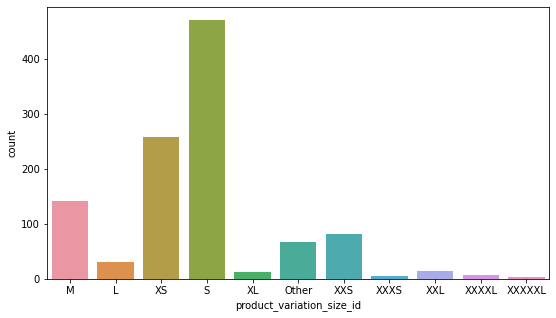

In [90]:
# plot a figure for product_variation_size_id data counting after cleaning it
fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot('product_variation_size_id',
              data = train,
              ax = ax)

## Product color (Data Analysis and Cleaning)

In [91]:
# Analysis the product_color -- count the number of repetition for each category
product_clr = train['product_color'].value_counts()
product_clr[product_clr > 1]

black               219
white               173
blue                 77
yellow               69
pink                 68
green                61
red                  61
grey                 48
purple               37
armygreen            22
winered              19
navyblue             18
orange               16
multicolor           14
khaki                10
white & green         8
lightblue             8
coffee                6
gray                  6
skyblue               6
beige                 5
brown                 5
rosered               5
rose                  4
lightpink             4
darkblue              4
White                 3
Black                 3
black & green         3
black & white         3
navy                  3
burgundy              2
white & black         2
coolblack             2
Army green            2
lightgreen            2
floral                2
dustypink             2
applegreen            2
orange-red            2
fluorescentgreen      2
lightred        

In [92]:
# The main colors are black, white, red, yellow, blue, green, pink, grey, purple, orange, brown and 'Other'
# Also we can add another color catergory like 'dual' for items that contain 2 different colors

# Create function for converting colors to apply it on train and test data
def color_convert(data):
  # Collect all dual colors together
  dual_colors = np.unique([x for x in data['product_color'] if '&' in str(x)])
  data.loc[[idx for idx, x in enumerate(data['product_color']) if x in dual_colors], ['product_color']] = 'dual'

  # Convert all colors name to lowercase
  data['product_color'] = [str(x).lower() for x in data['product_color']]

  # Collect all green colors together
  green_colors = np.unique([x for x in data['product_color'] if 'green' in str(x)])
  green_colors = list(green_colors) + ['khaki']
  data.loc[[idx for idx, x in enumerate(data['product_color']) if x in green_colors], ['product_color']] = 'green'

  # Collect all blue colors together
  blue_colors = np.unique([x for x in data['product_color'] if 'blue' in str(x)])
  blue_colors = list(blue_colors) + ['navy']
  data.loc[[idx for idx, x in enumerate(data['product_color']) if x in blue_colors], ['product_color']] = 'blue'

  # Collect all red colors together
  red_colors = np.unique([x for x in data['product_color'] if 'red' in str(x)])
  red_colors = list(red_colors) + ['wine']
  data.loc[[idx for idx, x in enumerate(data['product_color']) if x in red_colors], ['product_color']] = 'red'

  # Collect all pink colors together
  pink_colors = np.unique([x for x in data['product_color'] if 'pink' in str(x)])
  pink_colors = list(pink_colors) + ['rose', 'floral']
  data.loc[[idx for idx, x in enumerate(data['product_color']) if x in pink_colors], ['product_color']] = 'pink' 

  # Change cofee to brown 
  data['product_color'] = data['product_color'].replace('coffee', 'brown')

  # Collect all yellow colors together
  yellow_colors = np.unique([x for x in data['product_color'] if 'yellow' in str(x)])
  data.loc[[idx for idx, x in enumerate(data['product_color']) if x in yellow_colors], ['product_color']] = 'yellow' 


  # Collect all grey colors together
  grey_colors = np.unique([x for x in data['product_color'] if 'grey' in str(x)])
  gray_colors = np.unique([x for x in data['product_color'] if 'gray' in str(x)])
  grey_colors = list(grey_colors) + list(gray_colors)
  data.loc[[idx for idx, x in enumerate(data['product_color']) if x in grey_colors], ['product_color']] = 'grey' 


# Call function of color_convert
color_convert(train)
color_convert(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [93]:
# define the main color categories
main_color_categories = ['black', 'white', 'blue', 'green', 'red', 'pink', 'yellow', 'grey', 'purple', 'dual', 'orange', 'beige', 'brown', 'other', 'multicolor']

# set colors that doesn't belong to main color categories to other
train.loc[[idx for idx, x in enumerate(train['product_color']) if x not in main_color_categories], ['product_color']] = 'other'
test.loc[[idx for idx, x in enumerate(test['product_color']) if x not in main_color_categories], ['product_color']] = 'other'



In [94]:
# count the number of repetition for each category after minimizing the number of categories
product_clr = train['product_color'].value_counts()
product_clr[product_clr > 1]

black         222
white         176
blue          122
green         105
red            94
pink           81
yellow         70
grey           56
other          55
purple         37
dual           30
orange         16
multicolor     14
brown          11
beige           5
Name: product_color, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


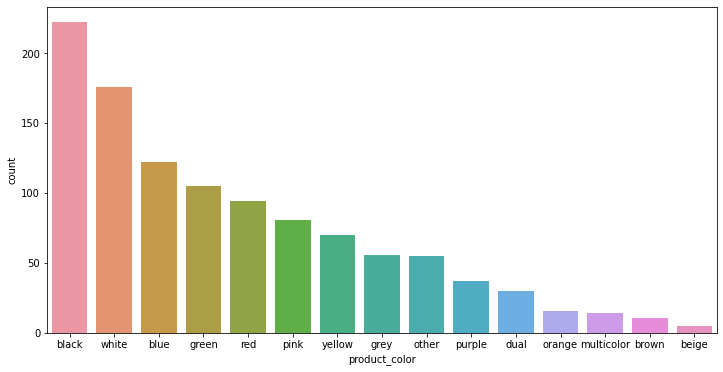

In [95]:
# plot a figure for product_color data counting after cleaning it
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot('product_color',
              data = train,
              order = train['product_color'].value_counts().index,
              ax = ax)

plt.show()

## Price and Retail Price (Data Analysis and Cleaning)

In [96]:
# Extracting new information from price and retail price that may add useful factor to our models
# According to this fourmla: Discount%=(Original Price - Sale price)/Original price*100
# stackoverflow useful link: https://stackoverflow.com/questions/43720502/calculating-discount-percentage-of-a-given-discounted-price#:~:text=Discount%25%3D(Original%20Price%20%2D%20Sale%20price)%2FOriginal%20price*100&text=This%20gives%20you%20the%20porcentage,not%20the%20discount%20it%20self.

train['discount_percentage'] = (train['retail_price'] - train['price']) / train['retail_price'] * 100

# Apply same fourmela on testing set
test['discount_percentage'] = (test['retail_price'] - test['price']) / test['retail_price'] * 100

train[['retail_price', 'price', 'discount_percentage']].head()

,retail_price,price,discount_percentage
0,7,8.00,-14.285714
1,7,8.00,-14.285714
2,34,6.00,82.352941
3,4,4.67,-16.750000
4,11,8.00,27.272727


## Units sold (Data Analysis and Cleaning)

In [97]:
# Analysis the units_sold feature 
train['units_sold'].value_counts()

100       353
1000      280
5000      139
10000     125
20000      79
50         54
10         37
50000      12
100000      5
8           4
1           3
2           2
7           1
Name: units_sold, dtype: int64

In [98]:
# As the units sold less than 10 has a low count we can change them to 10 to minimize the number of categories
# and as they have a very smal count they won't affect the count of the category 10 and even they won't
# affect the order of data 

train.loc[train['units_sold'] < 10, 'units_sold'] = 10
test.loc[test['units_sold'] < 10, 'units_sold'] = 10

train['units_sold'].value_counts()

100       353
1000      280
5000      139
10000     125
20000      79
50         54
10         47
50000      12
100000      5
Name: units_sold, dtype: int64

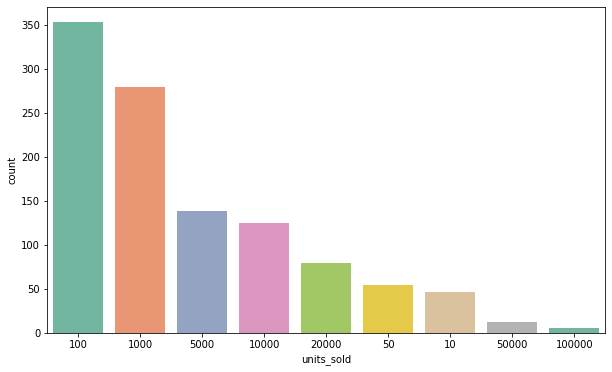

In [99]:
# plot a figure for units_sold data counting after cleaning it

plt.figure(figsize=(10, 6))
ax = sns.countplot(x = 'units_sold',
                   palette= "Set2",
                   order = train['units_sold'].value_counts().index,
                   data=train)

plt.show()

## Urgency text (Data Analysis and Cleaning)

In [100]:
# replace multiple values in a column in pandas dataframe
# get this snipt of code from Stackoverflow 
# https://stackoverflow.com/questions/60273679/replace-multiple-values-in-a-column-and-keep-other-values-unchanged-in-pandas-da

train['urgency_text'] = train['urgency_text'].replace({
    'Quantité limitée !' : 'Limited Quantity', 
    'Réduction sur les achats en gros': 'Discount on bulk purchases', 
    np.nan: 'None'
})

train['urgency_text'].value_counts()

None                          745
Limited Quantity              348
Discount on bulk purchases      1
Name: urgency_text, dtype: int64

In [101]:
# Repeat privious step in testing data
test['urgency_text'] = test['urgency_text'].replace({
    'Quantité limitée !' : 'Limited Quantity', 
    'Réduction sur les achats en gros': 'Discount on bulk purchases', 
    np.nan: 'None'
})

test['urgency_text'].value_counts()

None                355
Limited Quantity    124
Name: urgency_text, dtype: int64

## Tags (Data Analysis)

In [102]:
# Check the unique values of product tags
tags_categories = []
for i, x in enumerate(train['tags']):
  tags_categories = tags_categories + (str(x).split(","))

len(np.unique(tags_categories))

2181

In [103]:
# Check number of tags include in each product and save it into new column called tags_count
train['tags_count'] = [len(str(x).split(",")) for x in train['tags']]
train['tags_count']

0       16
1       22
2       23
3       16
4       20
        ..
1089    13
1090    18
1091    16
1092    20
1093    14
Name: tags_count, Length: 1094, dtype: int64

In [104]:
# Apply previous step on testing 
test['tags_count'] = [len(str(x).split(",")) for x in test['tags']]
test['tags_count']

0      19
1      22
2      20
3      18
4      13
       ..
474    19
475    16
476    17
477    17
478    19
Name: tags_count, Length: 479, dtype: int64

## Merchant name (Fill missing data)

In [105]:
# replase missing values in merchant_name with 'Unknown'
train['merchant_name'] = train['merchant_name'].replace(np.nan, 'Unknown')
test['merchant_name'] = test['merchant_name'].replace(np.nan, 'Unknown')

In [106]:
train.isna().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
urgency_text                    0
origin_country                  0
merchant_title                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_rating                 0
merchant_id                     0
merchant_has_profile_picture    0
id            

## Merchant info subtitle

In [107]:
# Analysis the merchant_info_subtitle feature
train["merchant_info_subtitle"].value_counts()

86 % avis positifs (12,309 notes)    8
83 % avis positifs (32,168 notes)    7
85 % avis positifs (80,093 notes)    5
84 % avis positifs (1,047 notes)     5
85 % avis positifs (5,264 notes)     5
                                    ..
90 % avis positifs (2,359 notes)     1
90 % avis positifs (26,833 notes)    1
86 % avis positifs (4,335 notes)     1
79 % avis positifs (667 notes)       1
78 % avis positifs (6,632 notes)     1
Name: merchant_info_subtitle, Length: 808, dtype: int64

In [108]:
# remove any white space from the data
train['merchant_info_subtitle'] = train['merchant_info_subtitle'].str.replace(' ', '')
train["merchant_info_subtitle"].value_counts()

86%avispositifs(12,309notes)    8
83%avispositifs(32,168notes)    7
85%avispositifs(80,093notes)    5
84%avispositifs(1,047notes)     5
85%avispositifs(5,264notes)     5
                               ..
90%avispositifs(2,359notes)     1
90%avispositifs(26,833notes)    1
86%avispositifs(4,335notes)     1
79%avispositifs(667notes)       1
78%avispositifs(6,632notes)     1
Name: merchant_info_subtitle, Length: 808, dtype: int64

In [109]:
# create function to check if the merchant has a positive feadback or not 
def has_positive_percentage(text):
    pos_feadback = 'avispositifs'
    if pos_feadback in str(text):
        return 1
    else:
        return 0

# Add new column with new informatin that chech if the merchant has a positive feadback or not 
# by calling the function has_positive_percentage     
train['merchant_has_feadback_rating'] = [has_positive_percentage(x) for x in train['merchant_info_subtitle']]
test['merchant_has_feadback_rating'] = [has_positive_percentage(x) for x in test['merchant_info_subtitle']]


In [110]:
import re

#Python Regular Expressions 
# https://developers.google.com/edu/python/regular-expressions#:~:text=The%20Python%20%22re%22%20module%20provides%20regular%20expression%20support.&text=The%20re.search()%20method,match%20object%20or%20None%20otherwise.

# create function that get the percentage of the merchant positive feadback if exist
def get_percentage(x): 
    match_reg = re.search(r'\d+%', str(x))

    if match_reg:
      return float(match_reg.group().split('%')[0])

    else:
      return None


In [111]:
# Add new columns that reprecent the positive feadback 
# and fill Nan value with mean of the column
train['merchant_positive_percentage'] = train['merchant_info_subtitle'].apply(get_percentage)
train['merchant_positive_percentage'].fillna((train['merchant_positive_percentage'].mean()), inplace=True)

test['merchant_positive_percentage'] = test['merchant_info_subtitle'].apply(get_percentage)
test['merchant_positive_percentage'].fillna((test['merchant_positive_percentage'].mean()), inplace=True)

## Correlation Matrix

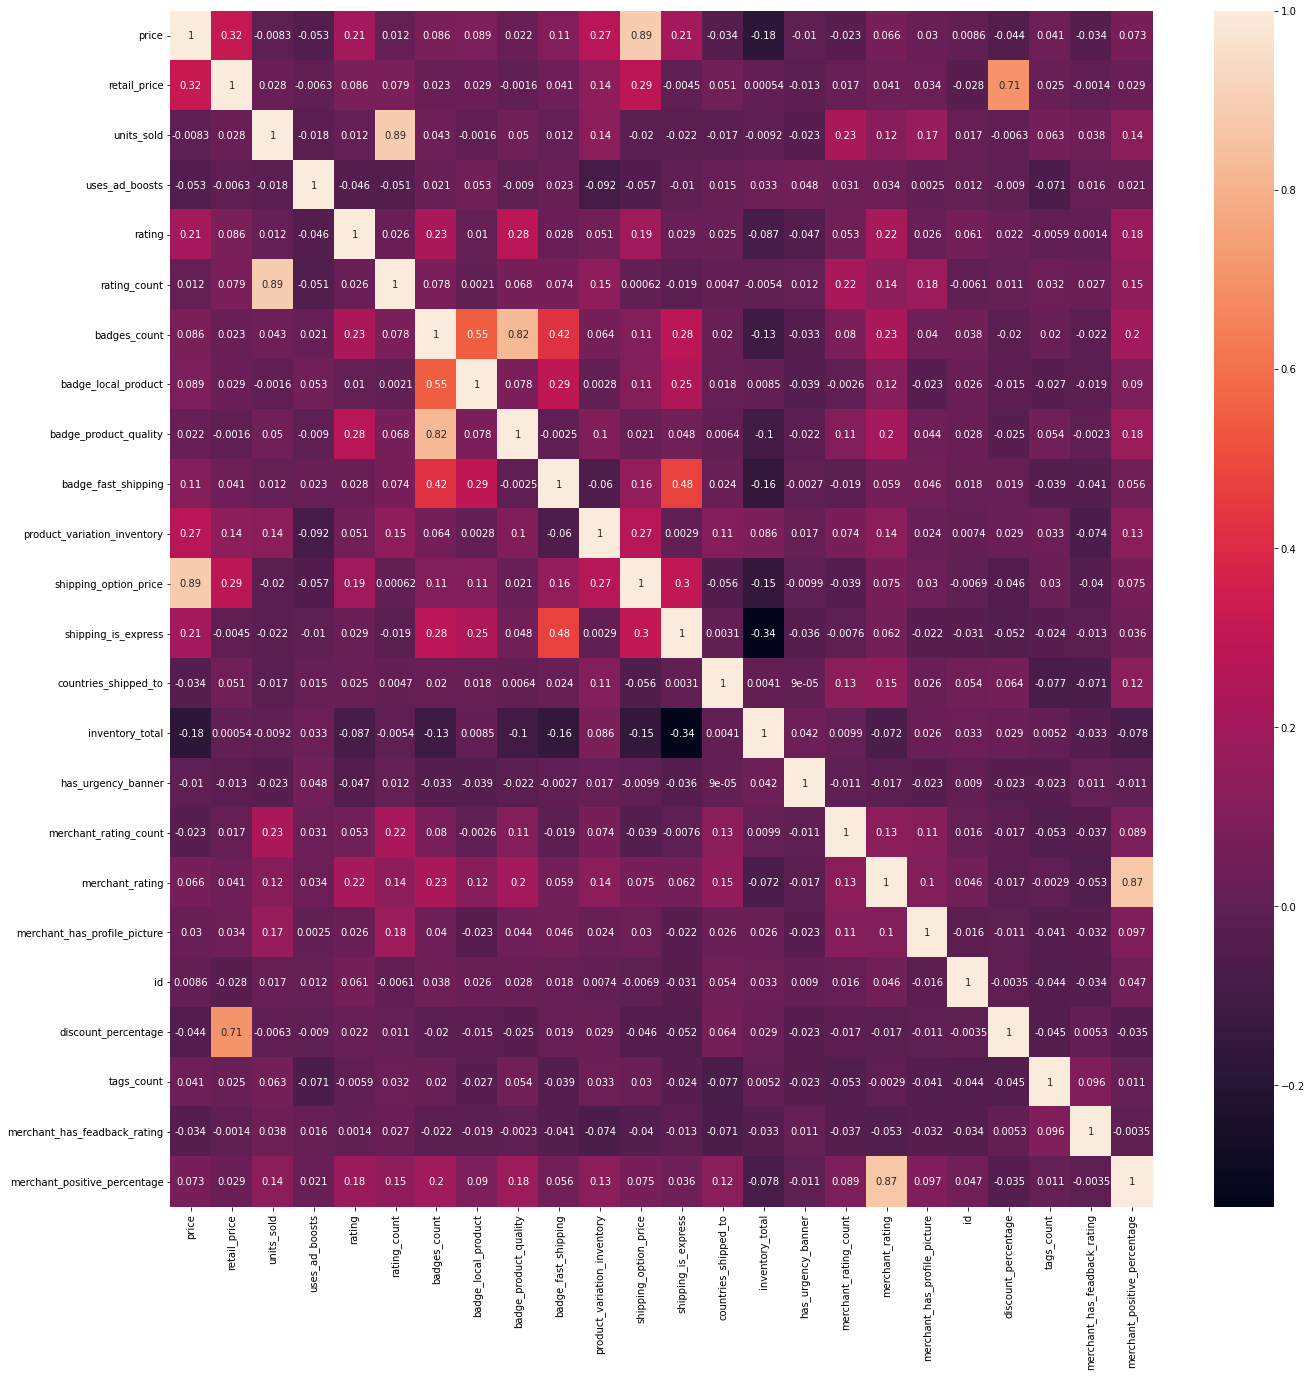

In [112]:
#ploting the correlation matrix for the traing data
fig, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(train.corr(),
            annot=True,
            ax=ax)

plt.show()

## Remove Remaining Unwanted Columns

In [113]:
# remove the columns that contain string values and not adding useful information
unwanted_cols = ['merchant_title', 
                 'merchant_name',
                 'merchant_info_subtitle',
                 'merchant_id',
                 'shipping_option_name',
                 'tags',
                 'urgency_text']

train = train.drop(columns=unwanted_cols)
test = test.drop(columns=unwanted_cols)

In [114]:
# show the information of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   float64
 5   rating_count                  1094 non-null   int64  
 6   badges_count                  1094 non-null   int64  
 7   badge_local_product           1094 non-null   int64  
 8   badge_product_quality         1094 non-null   int64  
 9   badge_fast_shipping           1094 non-null   int64  
 10  product_color                 1094 non-null   object 
 11  product_variation_size_id     1094 non-null   object 
 12  product_variation_inventory   1094 non-null   int64  
 13  shi

In [115]:
# show the information of the testing dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   units_sold                    479 non-null    int64  
 3   uses_ad_boosts                479 non-null    int64  
 4   rating_count                  479 non-null    int64  
 5   badges_count                  479 non-null    int64  
 6   badge_local_product           479 non-null    int64  
 7   badge_product_quality         479 non-null    int64  
 8   badge_fast_shipping           479 non-null    int64  
 9   product_color                 479 non-null    object 
 10  product_variation_size_id     479 non-null    object 
 11  product_variation_inventory   479 non-null    int64  
 12  shipping_option_price         479 non-null    int64  
 13  shipp

# Data Encoding


In [116]:
# remove the id as it's not feature from the traing and testing da
# and split the train feature and lable
X_train = train.drop(columns=['rating', 'id'])
y_train = train['rating']
X_test = test.drop(columns=['id'])

## Label Encoder instead of One Hot Encoding

In [117]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# # Label Encoding for Origin Country
# X_train['origin_country'] = label_encoder.fit_transform(X_train['origin_country'])
# X_test['origin_country'] = label_encoder.fit_transform(X_test['origin_country'])

# # Label Encoding for Product Color
# X_train['product_color'] = label_encoder.fit_transform(X_train['product_color'])
# X_test['product_color'] = label_encoder.fit_transform(X_test['product_color'])

# # Label Encoding for Product Size
# X_train['product_variation_size_id'] = label_encoder.fit_transform(X_train['product_variation_size_id'])
# X_test['product_variation_size_id'] = label_encoder.fit_transform(X_test['product_variation_size_id'])

# # Label Encoding for Urgency text
# X_train['urgency_text'] = label_encoder.fit_transform(X_train['urgency_text'])
# X_test['urgency_text'] = label_encoder.fit_transform(X_test['urgency_text'])


## One Hot Encoding for Origin Country

In [118]:
# Apply on training data
X_train = pd.get_dummies(X_train, 
                      columns = ['origin_country'],
                      prefix = 'country_',
                      drop_first = True)


In [119]:
# Apply on testing data
X_test = pd.get_dummies(X_test, 
                      columns = ['origin_country'],
                      prefix = 'country_',
                      drop_first = True)


## One Hot Encoding for Product Color

In [120]:
# Apply on training data
X_train = pd.get_dummies(X_train, 
                      columns = ['product_color'],
                      prefix = 'color_',
                      drop_first = True)


In [121]:
# Apply on testing data
X_test = pd.get_dummies(X_test, 
                      columns = ['product_color'],
                      prefix = 'color_',
                      drop_first = True)


## One Hot Encoding for Product Size

In [122]:
# Apply on training data
X_train = pd.get_dummies(X_train, 
                      columns = ['product_variation_size_id'],
                      prefix = 'size_',
                      drop_first = True)


In [123]:
# Apply on testing data
X_test = pd.get_dummies(X_test, 
                      columns = ['product_variation_size_id'],
                      prefix = 'size_',
                      drop_first = True)


## One Hot Encoding for Urgency text

In [124]:
# Apply on training data
# X_train = pd.get_dummies(X_train, 
#                       columns = ['urgency_text'],
#                       prefix = 'urgency_text_',
#                       drop_first = True)

In [125]:
# Apply on testing data
# X_test = pd.get_dummies(X_test, 
#                       columns = ['urgency_text'],
#                       prefix = 'urgency_text_',
#                       drop_first = True)


view the data after using one hot encoding

In [126]:
X_train

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,discount_percentage,tags_count,merchant_has_feadback_rating,merchant_positive_percentage,country__Other,country__US,color__black,color__blue,color__brown,color__dual,color__green,color__grey,color__multicolor,color__orange,color__other,color__pink,color__purple,color__red,color__white,color__yellow,size__M,size__Other,size__S,size__XL,size__XS,size__XXL,size__XXS,size__XXXS,size__XXXXL,size__XXXXXL
0,8.00,7,10000,1,1670,0,0,0,0,50,3,0,30,50,0.0,66644,4.137582,1,-14.285714,16,1,88.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,8.00,7,1000,0,843,1,1,0,0,50,3,0,37,50,0.0,25752,4.256873,0,-14.285714,22,1,91.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.00,34,100,0,10,0,0,0,0,50,2,0,41,50,0.0,3897,3.928920,0,82.352941,23,1,83.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4.67,4,100,1,82,0,0,0,0,5,1,0,25,50,0.0,7497,4.079365,0,-16.750000,16,1,87.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,8.00,11,1000,0,127,0,0,0,0,50,3,0,15,50,1.0,173,4.306358,0,27.272727,20,1,91.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,2150,0,0,0,0,50,1,0,41,50,0.0,230951,4.311066,0,0.000000,13,1,92.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1090,5.00,5,1000,0,377,1,0,1,0,31,2,0,35,50,0.0,2904,4.422521,0,0.000000,18,0,85.441676,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1091,9.00,48,1000,1,135,0,0,0,0,50,3,0,25,50,0.0,6632,3.748794,0,81.250000,16,1,78.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1092,11.00,10,10000,1,1479,0,0,0,0,50,2,0,45,50,1.0,5816,3.936382,0,-10.000000,20,1,83.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [127]:
X_test

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,discount_percentage,tags_count,merchant_has_feadback_rating,merchant_positive_percentage,country__Other,country__US,color__black,color__blue,color__brown,color__dual,color__green,color__grey,color__multicolor,color__orange,color__other,color__pink,color__purple,color__red,color__white,color__yellow,size__M,size__Other,size__S,size__XL,size__XS,size__XXL,size__XXS,size__XXXS,size__XXXXL,size__XXXXXL
0,5.75,5,10,1,0,0,0,0,0,5,2,0,139,50,0.0,3,2.333333,0,-15.000000,19,0,85.5625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,7.00,7,5000,0,579,0,0,0,0,50,2,0,31,50,0.0,4213,4.058391,0,0.000000,22,0,85.5625,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.00,16,1000,1,62,0,0,0,0,20,2,0,41,50,0.0,10501,4.029235,0,68.750000,20,0,85.5625,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,18.00,27,5000,1,1903,0,0,0,0,50,5,0,42,50,0.0,15855,4.052917,0,33.333333,18,0,85.5625,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,12.00,81,20000,0,1799,0,0,0,0,50,3,0,38,50,0.0,151914,4.127921,0,85.185185,13,0,85.5625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,0,50,4,0,35,50,0.0,572,3.367133,0,-14.285714,19,0,85.5625,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
475,6.00,17,5000,1,817,0,0,0,0,1,2,0,41,50,0.0,50864,4.079644,1,64.705882,16,0,85.5625,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
476,4.83,51,50,1,1,0,0,0,0,3,1,0,39,50,1.0,57,3.824561,0,90.529412,17,0,85.5625,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
477,3.00,3,100,1,8,0,0,0,0,3,1,0,26,50,1.0,1086,4.056169,0,0.000000,17,0,85.5625,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [128]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating_count                  1094 non-null   int64  
 5   badges_count                  1094 non-null   int64  
 6   badge_local_product           1094 non-null   int64  
 7   badge_product_quality         1094 non-null   int64  
 8   badge_fast_shipping           1094 non-null   int64  
 9   product_variation_inventory   1094 non-null   int64  
 10  shipping_option_price         1094 non-null   int64  
 11  shipping_is_express           1094 non-null   int64  
 12  countries_shipped_to          1094 non-null   int64  
 13  inv

# Spliting data


In [129]:
from sklearn.model_selection import train_test_split

# spliting the train data into new train and test to fit the models using the new train and test them using the new test
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train, random_state=25, test_size=0.1)


In [130]:
X_tr

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,discount_percentage,tags_count,merchant_has_feadback_rating,merchant_positive_percentage,country__Other,country__US,color__black,color__blue,color__brown,color__dual,color__green,color__grey,color__multicolor,color__orange,color__other,color__pink,color__purple,color__red,color__white,color__yellow,size__M,size__Other,size__S,size__XL,size__XS,size__XXL,size__XXS,size__XXXS,size__XXXXL,size__XXXXXL
153,8.00,7,1000,0,234,0,0,0,0,3,3,0,27,50,1.0,47356,4.056888,0,-14.285714,21,1,86.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
952,3.65,9,100,1,8,2,1,0,1,1,1,0,81,50,0.0,8888,4.243249,0,59.444444,17,1,91.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
186,3.00,7,100,1,6,0,0,0,0,5,1,0,19,50,0.0,1284,3.975078,0,57.142857,27,1,85.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
295,11.00,10,50000,0,13488,0,0,0,0,50,3,0,31,50,0.0,17816,4.179445,1,-10.000000,13,0,85.441676,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
964,9.00,57,1000,0,146,0,0,0,0,50,3,0,71,50,0.0,14442,4.143055,0,84.210526,19,0,85.441676,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,5.95,6,100,1,48,0,0,0,0,2,2,0,26,50,1.0,2363,3.853576,0,0.833333,22,1,81.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
886,8.00,140,10000,1,1910,0,0,0,0,50,3,0,19,50,1.0,2050,4.167805,0,94.285714,23,1,88.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
143,6.00,6,5000,0,901,1,0,1,0,50,2,0,31,50,0.0,9486,4.176998,1,0.000000,25,1,89.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
474,5.74,5,5000,0,1179,0,0,0,0,6,2,0,20,50,0.0,11854,4.094905,0,-14.800000,19,1,87.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# Building Models

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Decision Tree #1

thoughts and observations for trial 0, plan for trial 1: 
<br/>
<br/>
I used Decision tree with its defualt hyperparameter as the first try and I drop these features ['currency_buyer', 'theme', 'crawl_month', 'id', 'merchant_profile_picture' 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id', 'shipping_option_name', 'tags']
<br/>
<br/>
Also I used the Lable Encoder for Data Encoding 
<br/>
<br/>
I didn't excepect a high accuracy as I use the defualt parameters



In [132]:
r_state = 43
classifier_DTC = DecisionTreeClassifier(random_state = r_state)
classifier_DTC.fit(X_tr, y_tr)

# test the classifier
f1_score(y_ts, classifier_DTC.predict(X_ts), average='macro')

0.5137338747485747

In [133]:
# predict on test data set that provided on the competition
y_pred_DTC = classifier_DTC.predict(X_test)

In [134]:
# Save predicted result to csv file

DTC_pred_df = pd.DataFrame(data={'id': np.asarray(test['id']), 'rating': y_pred_DTC})

DTC_pred_df.to_csv('pred_DTC1.csv', index=False)

## Decision Tree #2

thoughts and observations for trial 1, plan for trial 2: 
<br/>
<br/>
in the seconed try, I used Decision tree with GridSearchCV function to get the best hyperparameters that give the better accuracy. I droped the same features as the previous step in addition to this feature 'urgency_text'
<br/>
<br/>
Also I used the Lable Encoder for Data Encoding in this try
<br/>
<br/>
I excepect a higher accuracy in compare to the previous trial



In [135]:
param_grid_DTC = [{'criterion': ['gini', 'entropy'],'max_depth': list(range(4, 15, 1))}]

classifier_DTC2 = GridSearchCV(DecisionTreeClassifier(), param_grid_DTC, cv=10)
classifier_DTC2.fit(X_tr, y_tr)

print(classifier_DTC2.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


{'criterion': 'entropy', 'max_depth': 4}


In [136]:
# test the classifier 
f1_score(y_ts, classifier_DTC2.predict(X_ts), average='micro')

0.8000000000000002

In [137]:
# predict on test data set that provided on the competition
y_pred_DTC2 = classifier_DTC2.predict(X_test)

In [138]:
# Save predicted result to csv file

DTC_pred2_df = pd.DataFrame(data={'id': np.asarray(test['id']), 'rating': y_pred_DTC2})

DTC_pred2_df.to_csv('pred_DTC2.csv', index=False)

## SVM #1

thoughts and observations for trial 2, plan for trial 3: 
<br/>
<br/>
In the third try, I used SVM classifier with its defualt hyperparameters. and I droped the same features as the previous trial
<br/>
<br/>
In this trial, I used the One Hot Encoding for Data Encoding instead of Lable Encoder
<br/>
<br/>
I didn't excepect a high accuracy as I use the defualt parameters



In [139]:

classifier_SVC = SVC()
classifier_SVC.fit(X_tr, y_tr)

# test the classifier 
f1_score(y_ts, classifier_SVC.predict(X_ts), average='micro')

0.7363636363636363

In [140]:
# predict on test data set that provided on the competition
y_pred_SVC = classifier_SVC.predict(X_test)

In [141]:
# Save predicted result to csv file

SVC_pred_df = pd.DataFrame(data={'id': np.asarray(test['id']), 'rating': y_pred_SVC})

SVC_pred_df.to_csv('pred_SVC1.csv', index=False)

## SVM #2

thoughts and observations for trial 3, plan for trial 4: 
<br/>
<br/>
in the fourth try, I used SVM classifier with GridSearchCV function to get the best hyperparameters that give the better accuracy. I droped the same features as the previous step 
<br/>
<br/>
Also I used the One Hot Encoding for Data Encoding instead of Lable Encoder
<br>
And before using the function of GridSearchCV I scale the data by using MinMaxScaler() and founded that it takes too much time while the model runs. So, I normalized the data instead and work on it as normalized data
<br/>
<br/>
I excepect a higher accuracy in compare to the previous trial



In [142]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# normalize all data
X_tr_normalized = preprocessing.normalize(X_tr)
X_tr_normalized = pd.DataFrame(X_tr_normalized, columns=X_tr.columns)

X_ts_normalized = preprocessing.normalize(X_ts)
X_ts_normalized = pd.DataFrame(X_ts_normalized, columns=X_ts.columns)

X_test_normalized = preprocessing.normalize(X_test)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

# define min max scaler
scaler = MinMaxScaler()

X_tr_scaled = scaler.fit_transform(X_tr)
X_tr_scaled = pd.DataFrame(X_tr_scaled, columns=X_tr.columns)

X_ts_scaled = scaler.fit_transform(X_ts)
X_ts_scaled = pd.DataFrame(X_ts_scaled, columns=X_ts.columns)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)



In [143]:
param_grid_SVC = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [1, 2, 3, 4, 5, 6],
    'gamma': [0.1, 0.5, 0.7, 1]
}
grid_classifier_SVC = GridSearchCV(SVC(probability=True), param_grid_SVC)
grid_classifier_SVC.fit(X_tr_normalized, y_tr)

print(grid_classifier_SVC.best_params_)

# best hyperparameters with scaled data
# {'C': 0.1, 'degree': 2, 'gamma': 0.7, 'kernel': 'poly'}
# f1_score: 0.7090909090909091 

# best hyperparameters with normalized data
# {'C': 200, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
# f1_score: 0.7545454545454545

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


{'C': 200, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}


In [144]:
# test the classifier
f1_score(y_ts, grid_classifier_SVC.predict(X_ts_normalized), average='micro')

0.7545454545454545

In [145]:
# predict on test data set that provided on the competition
y_pred_SVC2 = grid_classifier_SVC.predict(X_test_normalized)

In [146]:
# Save predicted result to csv file

SVC2_pred_df = pd.DataFrame(data={'id': np.asarray(test['id']), 'rating': y_pred_SVC2})

SVC2_pred_df.to_csv('pred_SVC2.csv', index=False)

## Naive Bayesian

thoughts and observations for trial 4, plan for trial 5: 
<br/>
<br/>
In the fourth try, I used Naive Bayesian classifier. and I droped the same features as the previous trials
<br/>
<br/>
Also, I used the One Hot Encoding for Data Encoding instead of Lable Encoder
<br/>
<br/>
I didn't excepect a high accuracy while using this classifier



In [147]:
from sklearn.naive_bayes import GaussianNB

classifier_GNB = GaussianNB()
classifier_GNB.fit(X_tr, y_tr)

# test the classifier
f1_score(y_ts, classifier_GNB.predict(X_ts), average='micro')


0.4909090909090909

In [148]:
# predict on test data set that provided on the competition
y_pred_GNB = classifier_GNB.predict(X_test)

In [149]:
# Save predicted result to csv file

GNB_pred_df = pd.DataFrame(data={'id': np.asarray(test['id']), 'rating': y_pred_GNB})

GNB_pred_df.to_csv('pred_GNB.csv', index=False)

## Gradient Boosting

In [150]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_GBC = GradientBoostingClassifier(random_state = 3)
classifier_GBC.fit(X_tr, y_tr)

# test the classifier
f1_score(y_ts, classifier_GBC.predict(X_ts), average='micro')

0.7909090909090909

In [151]:
# predict on test data set that provided on the competition
y_pred_GBC = classifier_GBC.predict(X_test)

In [152]:
# Save predicted result to csv file

GBC_pred_df = pd.DataFrame(data={'id': np.asarray(test['id']), 'rating': y_pred_GBC})

GBC_pred_df.to_csv('pred_GBC.csv', index=False)

## Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=5)
clf.fit(X_tr, y_tr)

y_pred_RF = clf.predict(X_test)

f1_score(y_ts, clf.predict(X_ts), average='micro')

0.8090909090909091

In [154]:
# Save predicted result to csv file

RF_pred_df = pd.DataFrame(data={'id': np.asarray(test['id']), 'rating': y_pred_RF})

RF_pred_df.to_csv('pred_RF.csv', index=False)

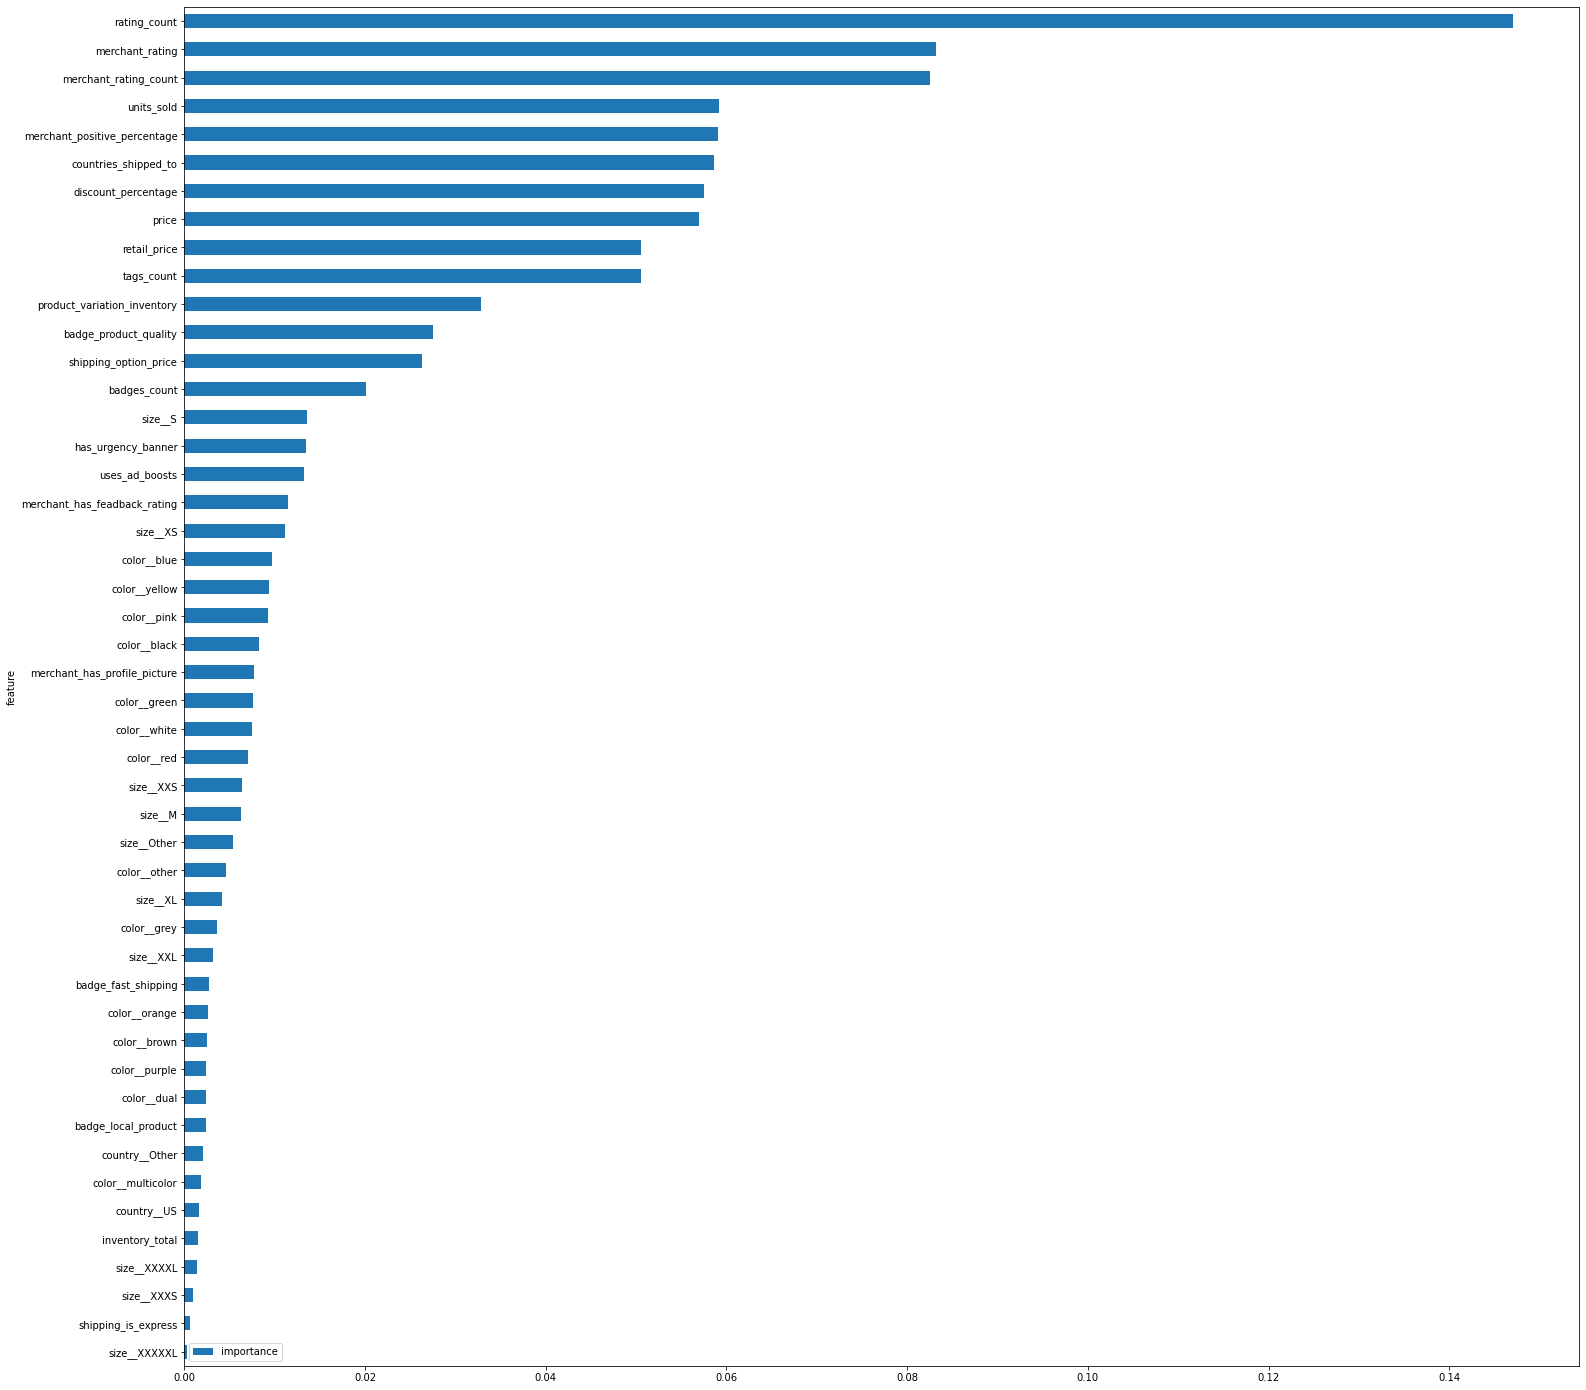

In [155]:
# Check importance feature
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

## KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN = KNeighborsClassifier()
classifier_KNN.fit(X_tr, y_tr)

# test the classifier
f1_score(y_ts, classifier_KNN.predict(X_ts), average='micro')

0.7090909090909091

In [157]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid_KNN = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

grid_classifier_KNN = GridSearchCV(knn, param_grid_KNN, cv = 10, scoring = 'f1_micro')
grid_classifier_KNN.fit(X_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='f1_micro')

In [158]:
print(grid_classifier_KNN.best_params_)

{'n_neighbors': 26, 'weights': 'distance'}


In [159]:
f1_score(y_ts, grid_classifier_KNN.predict(X_ts), average='micro')

0.7454545454545455

In [160]:
# predict on test data set that provided on the competition
y_pred_KNN = grid_classifier_KNN.predict(X_test)

In [161]:
# Save predicted result to csv file

KNN_pred_df = pd.DataFrame(data={'id': np.asarray(test['id']), 'rating': y_pred_KNN})

KNN_pred_df.to_csv('pred_KNN.csv', index=False)

# Questions

## Why Data Mining is a misnomer? What is another preferred name?



*  The Data Mining is a misnomer because the goal is the extraction of patterns and knowledge from large amounts of data, not the extraction (mining) of data itself.

*  The other preffered name for data mining is: Knowledge discovery (mining) in databases (KDD), 
knowledge extraction, data/pattern analysis, data 
archeology, data dredging, information harvesting, 
business intelligence, etc.
<br/>

The resource of the first part of the question is Wikipedia: https://en.wikipedia.org/wiki/Data_mining#:~:text=Data%20mining%20is%20the%20analysis,databases%22%20process%2C%20or%20KDD.&text=The%20term%20%22data%20mining%22%20is,(mining)%20of%20data%20itself. 


## What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

*  the general knowledge discovery process represents in finding/discovering useful knowledge/information from data.

*  **A data scientist** builds(develop) machine learning models on IDE’s while **an AI engineer** builds a deployable version of the model built by data scientists and integrates these models with the end product. AI engineers are also responsible for building secure web service APIs for deploying models if required.

resourse: https://www.springboard.com/blog/data-science/data-scientist-vs-artificial-intelligence-engineer/#:~:text=A%20data%20scientist%20builds%20machine,for%20deploying%20models%20if%20required.

## In data mining, what is the difference between prediction and categorization?

**Categorization/Classification** is the process of identifying the category or class label of the new observation to which it belongs. **Predication** is the process of identifying the missing or unavailable numerical data for a new observation.

## Why data science/machine learning is a bad idea in the context of information security?

Because of the Security/Ethical Issues that related to AI-based/DS-based projects and represented in:

* Backdoor attack
* Adversarial samples
* Information leak
* Stealing neural network
* Membership inference
* Ethical issue

## What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

* CIA - Confidentiality, Integrity and Availability.
* The CIA is a model designed to guide policies for information security within an organization.
* Another definition: The CIA Triad is actually a security model that has been developed to help people think about various parts of IT security.

<br/>

We can use CIA to access the security/privacy aspect of the AI system/pipelines through break the confidentiality as it is the set of rules that limits access to information, the integrity as it is the assurance that the information is trustworthy and accurate, and the availability as it is the guarantee of reliable access to the information by authorized people.

<br/>
<br/>
resorces: 

*  https://whatis.techtarget.com/definition/Confidentiality-integrity-and-availability-CIA


*  https://www.forcepoint.com/cyber-edu/cia-triad  